In [1]:
### Libraries ###

import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML



# Loading data

In [2]:
combined_state_data = pd.read_csv("State_Combined_Df.csv", header=0)

In [3]:
combined_state_data = combined_state_data.drop(['Unnamed: 0'], axis=1)

In [4]:
combined_state_data.shape

(390865, 20)

#### Converting Amorterm in years to calculate PMT

In [5]:
for i in combined_state_data.index:
    combined_state_data.at[i,'AmorTerm'] = combined_state_data.at[i,'AmorTerm']

In [6]:
# Taking first row to find pmt for a single application

np.round(abs(np.pmt(rate=combined_state_data.at[0,'Rate'], fv=0, nper=combined_state_data.at[0,'AmorTerm'], pv=combined_state_data.at[0,'Amount'])), 2)

2173.11

In [7]:
# Creating a PMT column
combined_state_data['PMT'] = "Nan"

In [12]:
#Applyting pmt function to the entire dataFrame

for i in combined_state_data.index:
    combined_state_data.at[i,'PMT'] = np.round(abs(np.pmt(rate=(combined_state_data.at[i,'Rate']/12), fv=0, nper=combined_state_data.at[i,'AmorTerm'], pv=combined_state_data.at[i,'Amount'])), 2) 
    
    

In [13]:
combined_state_data.head()

Year  FIPSStateCode  FIPSCountyCode  Income  IncRat     UPB   LTV  \
0  2017             72              15   60588  3.2928   71967  0.89   
1  2017             66              10  210264  4.0513  514837  0.94   
2  2017             66              10  114744  2.2109  425563  1.04   
3  2017             48             439  164988  2.3403  251800  0.75   
4  2017              6              99   56160  1.0537  290613  0.85   

   MortDate  Purpose  Product   ...     AmorTerm  NumBor  Occup    Rate  \
0      2016        2        1   ...          180       2      1  0.0288   
1      2016        2        1   ...          360       2      1  0.0325   
2      2016        1        1   ...          360       2      1  0.0325   
3      2016        2        1   ...          360       2      1  0.0338   
4      2016        2        1   ...          360       2      1  0.0325   

   Amount   Front    Back  BoCreditScor    StateName      PMT  
0   75000  0.1118  0.2265             5  Puerto Rico   513.62  
1  520000  0.1446  0.2370             5         Guam  2263.07  
2  429831  0.2312  0.3152             5         Guam  1870.65  
3  251800  0.1657  0.3430             4        Texas   1113.9  
4  290613  0.4062  0.4224             3   California  1264.77  

[5 rows x 21 columns]

# Finding co-relations on the combined /filtered data

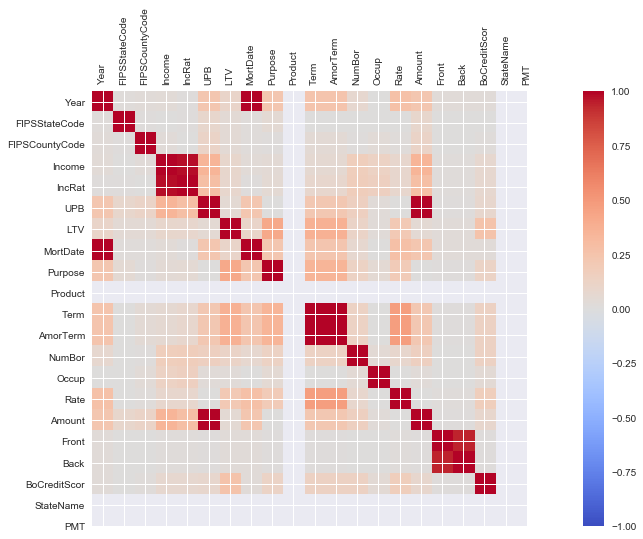

In [9]:
## Corelation between selected variables- 2015 data

corr = combined_state_data.corr().abs()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches(20,8)
ticks = np.arange(0,len(combined_state_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(combined_state_data.columns)
ax.set_yticklabels(combined_state_data.columns)
plt.show()

In [14]:
# Plotting variables where correlations are maximum

corr = combined_state_data.corr()
corr2 = corr[(corr >0.4) & (corr !=1)]
#corr3 = corr2.dropna(thresh=1)
from matplotlib import pyplot
pyplot.figure(figsize=(25, 18))
sns.heatmap(corr2, cbar = True,   annot=True,  cmap= 'coolwarm')

In [14]:
## Variables with maximum corelation

max_corr_vars = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(max_corr_vars)

Term            AmorTerm        0.999961
UPB             Amount          0.999808
Year            MortDate        0.994804
Income          IncRat          0.979218
Front           Back            0.941586
Term            Rate            0.470174
AmorTerm        Rate            0.470130
LTV             AmorTerm        0.371328
                Term            0.371189
Income          Amount          0.350492
                UPB             0.350384
IncRat          Amount          0.284438
                UPB             0.284367
Year            AmorTerm        0.242410
                Term            0.242282
MortDate        AmorTerm        0.241310
                Term            0.241180
Year            Amount          0.231811
                UPB             0.231458
UPB             MortDate        0.229651
MortDate        Amount          0.229615
UPB             Term            0.219731
                AmorTerm        0.219668
Term            Amount          0.219200
AmorTerm        

# Correlations:
##### Lets start with income amount and rate:

In [15]:
amount_rate_income = combined_state_data[["Amount", "Rate", "Income" ]]

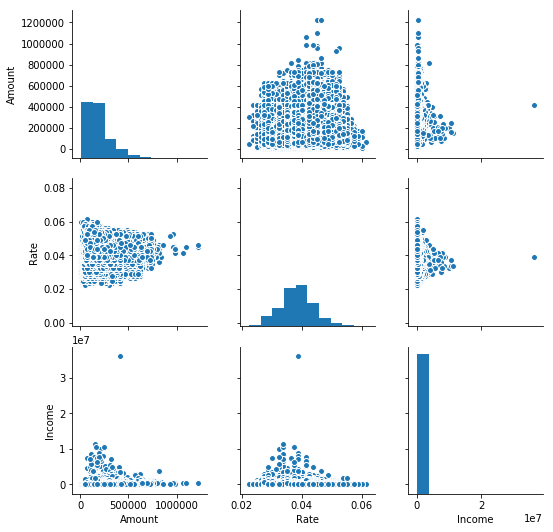

In [16]:
sns.pairplot(amount_rate_income.dropna())

In [17]:
amount_DTI_Income = combined_state_data[['Amount', 'IncRat', 'Income']]

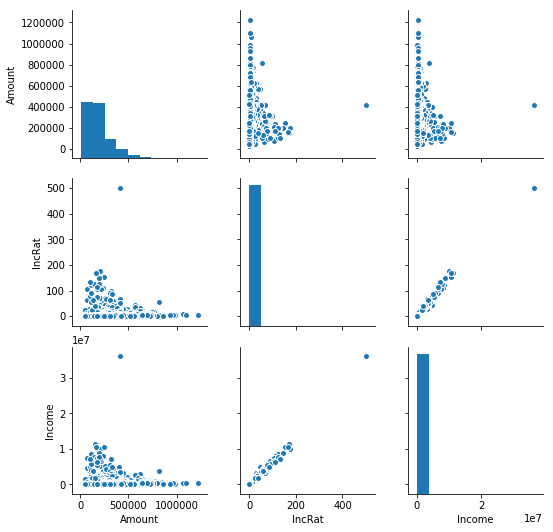

In [18]:
sns.pairplot(amount_DTI_Income.dropna())

In [19]:
pmt_rate_amount = combined_state_data[['PMT','Rate','Amount']]

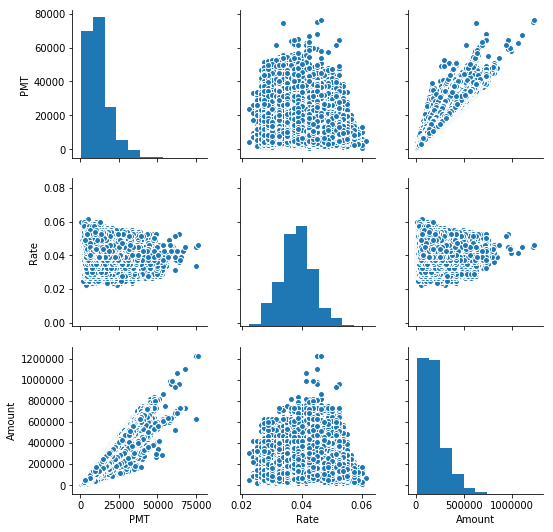

In [20]:
sns.pairplot(pmt_rate_amount.dropna())

In [21]:
creds_rate_amount = combined_state_data[['BoCreditScor','Rate','Amount']]

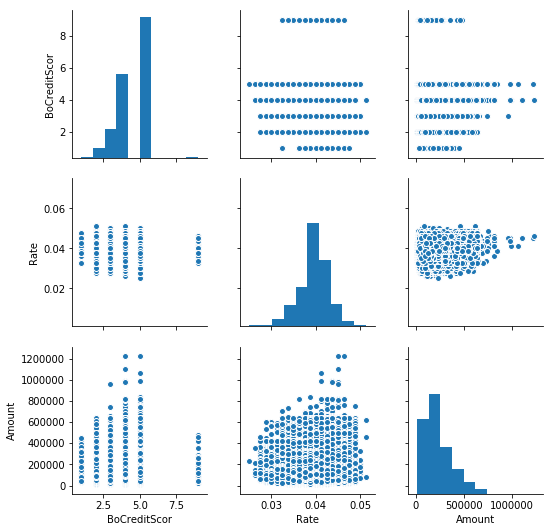

In [32]:
sns.pairplot(creds_rate_amount.dropna())

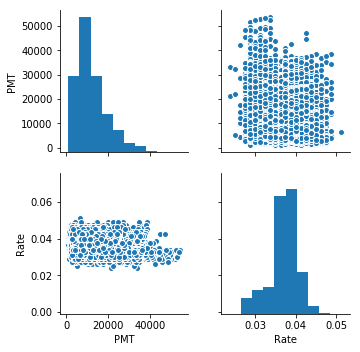

In [34]:
pmt_rate = filtered_col_df[['PMT','Rate']]
sns.pairplot(pmt_rate.dropna())

##### No strong correlations found here, need to to analyze it at indivisual level

#### Lets Consider FICO

In [22]:
#2017 data

print("Average Interest Rate: ")
c1 = combined_state_data[combined_state_data["BoCreditScor"] ==1].describe()["Rate"]['mean']
c2 = combined_state_data[combined_state_data["BoCreditScor"] ==2].describe()["Rate"]['mean']
c3 = combined_state_data[combined_state_data["BoCreditScor"] ==3].describe()["Rate"]['mean']
c4 = combined_state_data[combined_state_data["BoCreditScor"] ==4].describe()["Rate"]['mean']
c5 = combined_state_data[combined_state_data["BoCreditScor"] ==5].describe()["Rate"]['mean']


print("1) CREDIT SCORE = <620 \nAverage interest rate =",c1,"\n\n2)CREDIT SCORE = 620 to < 660\nAverage interest rate =",c2," \n\n3) CREDIT SCORE = 660 < 700\nAverage interest rate = ",c3," \n\n4) CREDIT SCORE =700 < 760\nAverage interest rate = ",c4," \n\n5) CREDIT SCORE = 760\nAverage interest rate = ",c5)
print("\n\n\nPrime Interest Rates in 2017:\n12/14/2017 4.50%\n06/15/2017 4.25%\n03/16/2017 4.00%\n\n*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm ")
print("\n\nGood the score, less the interest rate")

Average Interest Rate: 
1) CREDIT SCORE = <620 
Average interest rate = 0.04352952448545058 

2)CREDIT SCORE = 620 to < 660
Average interest rate = 0.0410651637360897  

3) CREDIT SCORE = 660 < 700
Average interest rate =  0.04005151212637353  

4) CREDIT SCORE =700 < 760
Average interest rate =  0.03901581576078299  

5) CREDIT SCORE = 760
Average interest rate =  0.037913768942271636



Prime Interest Rates in 2017:
12/14/2017 4.50%
06/15/2017 4.25%
03/16/2017 4.00%

*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm 


Good the score, less the interest rate


In [23]:
#2017 data

c1 = combined_state_data[combined_state_data["BoCreditScor"] == 1].describe()["LTV"]['mean']
c2 = combined_state_data[combined_state_data["BoCreditScor"] == 2].describe()["LTV"]['mean']
c3 = combined_state_data[combined_state_data["BoCreditScor"] == 3].describe()["LTV"]['mean']
c4 = combined_state_data[combined_state_data["BoCreditScor"] == 4].describe()["LTV"]['mean']
c5 = combined_state_data[combined_state_data["BoCreditScor"] == 5].describe()["LTV"]['mean']

print("1 = <620 \nAverage LTV =",c1,"\n\n2 = 620 to < 660\nAverage LTV =",c2," \n\n3 = 660 < 700\nAverage LTV = ",c3," \n\n4 =700 < 760\nAverage LTV = ",c4," \n\n5 = 760\nAverage LTV = ",c5)
print("\nHere people with more Credit score got higher amount of Loan\n\n\n")

1 = <620 
Average LTV = 0.9230115684882884 

2 = 620 to < 660
Average LTV = 0.86488806259075  

3 = 660 < 700
Average LTV =  0.809711812202657  

4 =700 < 760
Average LTV =  0.770908423447231  

5 = 760
Average LTV =  0.7049077268425683

Here people with more Credit score got higher amount of Loan





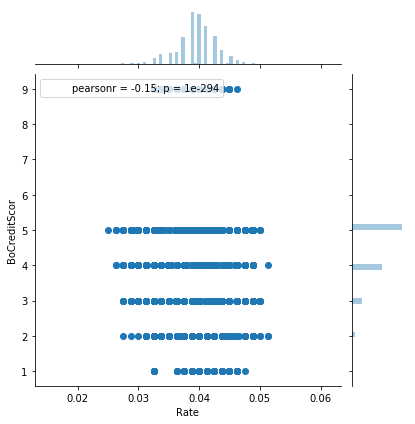

In [37]:
sns.jointplot('Rate','BoCreditScor',data,kind='scatter')

#### Lets try State wise interest rate

In [15]:
states = set(combined_state_data["StateName"])
clean_states = list(states)
clean_states.remove(clean_states[0])
combined_state_data.head()

Year  FIPSStateCode  FIPSCountyCode  Income  IncRat     UPB   LTV  \
0  2017             72              15   60588  3.2928   71967  0.89   
1  2017             66              10  210264  4.0513  514837  0.94   
2  2017             66              10  114744  2.2109  425563  1.04   
3  2017             48             439  164988  2.3403  251800  0.75   
4  2017              6              99   56160  1.0537  290613  0.85   

   MortDate  Purpose  Product   ...     AmorTerm  NumBor  Occup    Rate  \
0      2016        2        1   ...          180       2      1  0.0288   
1      2016        2        1   ...          360       2      1  0.0325   
2      2016        1        1   ...          360       2      1  0.0325   
3      2016        2        1   ...          360       2      1  0.0338   
4      2016        2        1   ...          360       2      1  0.0325   

   Amount   Front    Back  BoCreditScor    StateName      PMT  
0   75000  0.1118  0.2265             5  Puerto Rico   513.62  
1  520000  0.1446  0.2370             5         Guam  2263.07  
2  429831  0.2312  0.3152             5         Guam  1870.65  
3  251800  0.1657  0.3430             4        Texas   1113.9  
4  290613  0.4062  0.4224             3   California  1264.77  

[5 rows x 21 columns]

In [46]:
df = combined_state_data
df["PMT"] = df.PMT.astype(float)

In [47]:
pmt_state={}
std_state = {}
for bank in clean_states:
    pmt_s = df[df["StateName"] =="{0}".format(bank)].describe()["PMT"]['mean']
    pmt_std_s = df[df["StateName"] =="{0}".format(bank)].describe()["PMT"]['std']
    pmt_state[bank] = pmt_s
    std_state[bank] = pmt_std_s
    

In [48]:
pmt_std_state = pd.DataFrame(list(std_state.items()), columns=["State","PMT_std"])

In [49]:
pmt_state_mean = pd.DataFrame(list(pmt_state.items()), columns=["State","PMT_mean"])

In [52]:
pmt_main =  pd.merge(pmt_std_state, pmt_state_mean, on= "State")

In [53]:
pmt_main.head(100)

State     PMT_std     PMT_mean
0     Rhode Island  520.870791  1241.306566
1      Connecticut  556.998863  1183.240676
2            Texas  489.512084  1227.551480
3         Missouri  465.482821   826.867705
4          Vermont  394.296234   850.719610
5          Florida  534.744919  1182.380976
6      Mississippi  426.950411  1009.094286
7         New York  690.228642  1094.681158
8     North Dakota  511.356386  1006.864140
9        Tennessee  557.905296  1129.995992
10    Pennsylvania  465.541267   877.272117
11    South Dakota  488.467768   864.774219
12      California  710.447827  2147.772028
13        Delaware  466.063127  1122.755805
14  Virgin Islands  403.990604  1345.443333
15       Wisconsin  449.823591   844.157595
16         Arizona  530.836461  1160.517211
17        Arkansas  510.731508  1045.549519
18       Minnesota  492.752044   924.061735
19        Oklahoma  472.376548   859.323446
20          Kansas  456.392113   792.838411
21   Massachusetts  559.163144  1279.866837
22        Michigan  491.049357   960.849301
23   New Hampshire  550.355337  1031.574058
24        Illinois  481.690781   756.785410
25        Maryland  746.602667  1845.501139
26  South Carolina  472.348703   964.368117
27     Puerto Rico  373.687207   830.629667
28       Louisiana  487.290389  1103.595519
29          Nevada  534.362594  1285.823403
30         Montana  446.398619  1120.430515
31         Alabama  493.677677  1169.099325
32            Utah  526.208009  1306.923265
33        Kentucky  456.202087   890.213726
34      Washington  625.702417  1768.475884
35        Nebraska  499.535219   884.065131
36        Virginia  750.703484  1984.397376
37      New Jersey  778.433467  1517.478263
38      New Mexico  576.942046  1228.469771
39  North Carolina  478.045994  1200.176112
40            Ohio  485.591079   926.008463
41           Maine  497.867889  1053.926196
42           Idaho  451.045876  1039.322723
43         Georgia  476.440059  1224.311204
44          Oregon  464.881638  1239.442234
45            Iowa  456.958556   812.177199
46   West Virginia  457.041437   779.009620
47            Guam  531.543659  1540.772794
48          Hawaii  789.260972  2127.664058
49        Colorado  551.487978  1143.014046
50          Alaska  546.780583  1479.668400
51         Wyoming  515.255629  1014.127326
52         Indiana  462.251645   844.157880

In [54]:
pmt_state={}
std_state = {}
for bank in clean_states:
    pmt_max = df[df["StateName"] =="{0}".format(bank)].describe()["PMT"]['max']
    pmt_min = df[df["StateName"] =="{0}".format(bank)].describe()["PMT"]['min']
    pmt_state[bank] = pmt_max
    std_state[bank] = pmt_min

State     PMT_std
0  Rhode Island  520.870791
1   Connecticut  556.998863
2         Texas  489.512084
3      Missouri  465.482821
4       Vermont  394.296234

In [144]:
df[df["Income"]>1000].shape

(389846, 21)

In [151]:
df[df["IncRat"] == 0.0001].head()

Year  FIPSStateCode  FIPSCountyCode  Income  IncRat     UPB   LTV  \
372928  2010              1              21       1  0.0001  276393  0.99   
372934  2010              1              73       1  0.0001  201257  0.95   
372935  2010              1              73       1  0.0001  220860  0.95   
372938  2010              1              73       1  0.0001  266803  0.99   
372941  2010              1             115       1  0.0001  219585  1.00   

        MortDate  Purpose  Product   ...     AmorTerm  NumBor  Occup    Rate  \
372928      2010        2        1   ...          360       1      1  0.0488   
372934      2010        2        1   ...          360       1      1  0.0438   
372935      2010        2        1   ...          360       2      1  0.0488   
372938      2010        2        1   ...          360       2      1  0.0425   
372941      2010        2        1   ...          360       1      1  0.0425   

        Amount   Front     Back  BoCreditScor  StateName      PMT  
372928  276393    9.99     9.99             2    Alabama  1463.53  
372934  201257    9.99     9.99             4    Alabama  1005.44  
372935  220860  945.00  1643.00             2    Alabama  1169.48  
372938  266803  841.00   841.00             4    Alabama  1312.51  
372941  219888    9.99     9.99             5    Alabama  1081.72  

[5 rows x 21 columns]

In [197]:
df1 = df[df["Income"] > 10000]

In [198]:
df1 = df1[df1["IncRat"] != 1]

In [199]:
df1.shape

(389684, 21)

In [200]:
plot_dist = ["Income", "IncRat", "LTV", "AmorTerm", "Rate", "Amount", "BoCreditScor", "PMT"]

In [188]:
df1["IncRat"].mode()[1]

1.0526

In [150]:
print("Min: ",df["IncRat"].min())
print("Median: ",df["IncRat"].median())
print("Mode: ",float(df["IncRat"].mode()))
print("Mean: ",df["IncRat"].mean())
print("Max: ",df["IncRat"].max())

Min:  0.0001
Median:  1.2917
Mode:  0.0001
Mean:  1.5899605820422709
Max:  499.6991


In [206]:
for col in plot_dist:
    print(col)
    print(float(df1[col].describe()["mean"]),"MEAN")
    print(float(df1[col].median()),"MEDIAN")
    print(df1[col].mode(),"MODE")
    print(float(df1[col].max()),"MAX")
    print(float(df1[col].min()),"MIN")
    print(float(df1[col].std()),"STD\n\n")

Income
104448.5309019616 MEAN
84480.0 MEDIAN
0    60000
dtype: int64 MODE
36178212.0 MAX
10052.0 MIN
125181.34846507857 STD


IncRat
1.5942785965038229 MEAN
1.2947 MEDIAN
0    0.9091
1    1.0526
dtype: float64 MODE
499.6991 MAX
0.1369 MIN
1.8955131782226018 STD


LTV
0.7373919483467818 MEAN
0.79 MEDIAN
0    0.8
dtype: float64 MODE
1.4749 MAX
0.0099 MIN
0.1673160862405583 STD


AmorTerm
307.7871788423441 MEAN
360.0 MEDIAN
0    360
dtype: int64 MODE
360.0 MAX
60.0 MIN
79.60558538768053 STD


Rate
0.0385047027848588 MEAN
0.0388 MEDIAN
0    0.0388
dtype: float64 MODE
0.0613 MAX
0.0225 MIN
0.005131541212082302 STD


Amount
183619.1727476622 MEAN
153550.0 MEDIAN
0    417000
dtype: int64 MODE
1223475.0 MAX
10000.0 MIN
112731.74822734245 STD


BoCreditScor
4.455276583077571 MEAN
5.0 MEDIAN
0    5
dtype: int64 MODE
9.0 MAX
1.0 MIN
0.8306504772952454 STD


PMT
971.8871308547025 MEAN
826.66 MEDIAN
0    1962.08
dtype: float64 MODE
6294.03 MAX
53.59 MIN
578.3712759787776 STD




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f4eddd8>]],
      dtype=object)

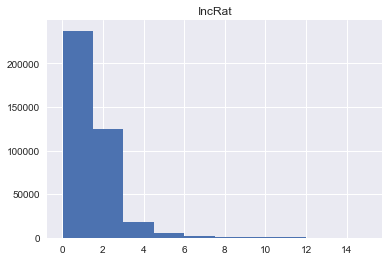

In [160]:
temp1 = df1[df1["IncRat"] < 15]
temp1.hist(column= "IncRat")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131ab12e8>]],
      dtype=object)

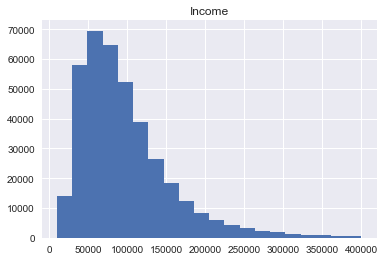

In [202]:
temp1 = df1[df1["Income"] < 400000]
temp1.hist(column= "Income", bins= 20)

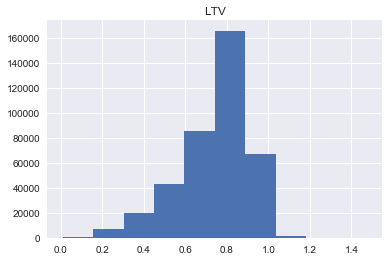

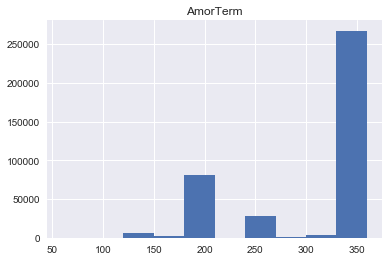

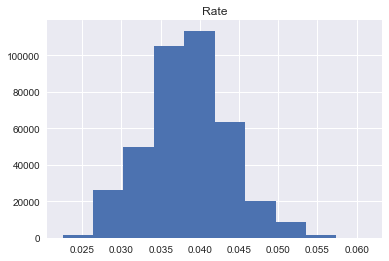

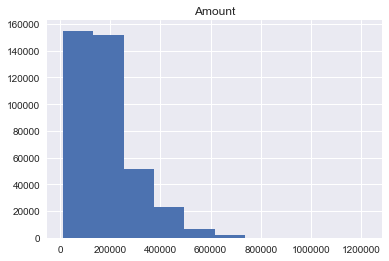

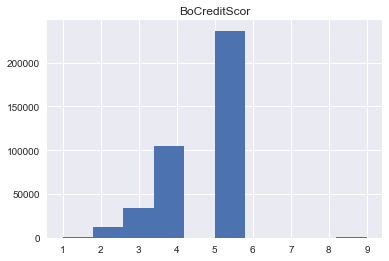

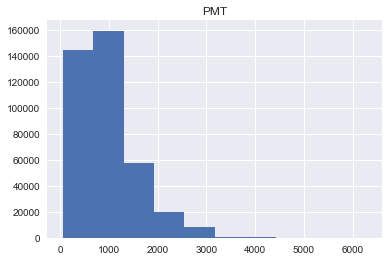

In [173]:
for p in plot_dist[2:]:
    df1.hist(column=p)

In [174]:
plot_dist

['Income',
 'IncRat',
 'LTV',
 'AmorTerm',
 'Rate',
 'Amount',
 'BoCreditScor',
 'PMT']

#### Baseline

In [ ]:
"""if df[df["rate"] >= rate_threshold]:
    score += 10

else:
    score+=5"""
    

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


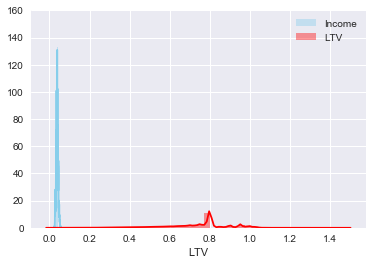

In [100]:
sns.distplot(df["Rate"], color="skyblue", label="Income")
sns.distplot( df["LTV"] , color="red", label="LTV")
sns.plt.legend()

<function matplotlib.pyplot.plot>

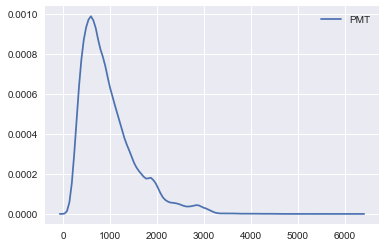

In [58]:
%matplotlib inline
import seaborn as sns
ax = sns.kdeplot(df["PMT"])
plt.plot

In [203]:
rate_state={}
for bank in clean_states:
    rate = df1[df1["StateName"] =="{0}".format(bank)].describe()["Income"]['mean']
    rate_state[bank] = rate


In [204]:
rate_state_df = pd.DataFrame(list(rate_state.items()), columns=["State","Avg_Income"])
rate_state_df

State     Avg_Income
0     Rhode Island  112029.653179
1      Connecticut  117420.467426
2            Texas  132888.771207
3         Missouri   92719.457788
4          Vermont   79571.789900
5          Florida  140152.226705
6      Mississippi  123962.333333
7         New York  112483.360989
8     North Dakota  113295.388199
9        Tennessee  116352.977616
10    Pennsylvania   92707.506433
11    South Dakota   99557.202498
12      California  149388.043851
13        Delaware  104441.440000
14  Virgin Islands   88100.000000
15       Wisconsin   92575.581027
16         Arizona  125087.382233
17        Arkansas  125686.945338
18       Minnesota   98971.962926
19        Oklahoma  101851.939430
20          Kansas   94775.991582
21   Massachusetts  113314.138720
22        Michigan  107484.820781
23   New Hampshire  115680.800954
24        Illinois   83776.210096
25        Maryland  150144.660213
26  South Carolina   95313.227684
27     Puerto Rico   74691.200000
28       Louisiana  110361.293769
29          Nevada  133159.422383
30         Montana  113146.931034
31         Alabama  119190.877551
32            Utah  106340.233202
33        Kentucky  102772.153003
34      Washington  133065.244755
35        Nebraska  109250.165729
36        Virginia  157894.864600
37      New Jersey  153274.351679
38      New Mexico  139110.697143
39  North Carolina  123117.777978
40            Ohio  110399.065122
41           Maine  110128.763366
42           Idaho   90618.561644
43         Georgia  115280.878261
44          Oregon   96568.365854
45            Iowa   92220.741359
46   West Virginia   99126.798929
47            Guam   97100.647059
48          Hawaii  129740.811594
49        Colorado  103609.135964
50          Alaska  156077.363636
51         Wyoming  110573.589520
52         Indiana   94961.855511

In [23]:
#2017 data


State  Avg_Rate
0     Rhode Island  0.041625
1      Connecticut  0.038823
2            Texas  0.039669
3         Missouri  0.039060
4          Vermont  0.039335
5          Florida  0.039566
6      Mississippi  0.038257
7         New York  0.038937
8     North Dakota  0.039618
9        Tennessee  0.037420
10    Pennsylvania  0.039603
11    South Dakota  0.038304
12      California  0.039389
13        Delaware  0.038956
14  Virgin Islands  0.043767
15       Wisconsin  0.038386
16         Arizona  0.038987
17        Arkansas  0.038884
18       Minnesota  0.038136
19        Oklahoma  0.039465
20          Kansas  0.038751
21   Massachusetts  0.038837
22        Michigan  0.037869
23   New Hampshire  0.039125
24        Illinois  0.038688
25        Maryland  0.039180
26  South Carolina  0.039352
27     Puerto Rico  0.035560
28       Louisiana  0.041088
29          Nevada  0.040067
30         Montana  0.039996
31         Alabama  0.037580
32            Utah  0.039233
33        Kentucky  0.037937
34      Washington  0.039634
35        Nebraska  0.039472
36        Virginia  0.038992
37      New Jersey  0.039328
38      New Mexico  0.039505
39  North Carolina  0.038066
40            Ohio  0.037790
41           Maine  0.038622
42           Idaho  0.039911
43         Georgia  0.038068
44          Oregon  0.039010
45            Iowa  0.038439
46   West Virginia  0.039761
47            Guam  0.034991
48          Hawaii  0.039413
49        Colorado  0.038870
50          Alaska  0.038176
51         Wyoming  0.037785
52         Indiana  0.037605

#### Lets try State wise

In [24]:
#2017 data

for state in set(combined_state_data["StateName"]):
    print("Average Interest Rate in :",state)
    print(combined_state_data[combined_state_data["StateName"] =="{0}".format(state)].describe()["Rate"]['mean'],"\n")

Average Interest Rate in : nan
nan 

Average Interest Rate in : Tennessee
0.03742009321595013 

Average Interest Rate in : Louisiana
0.04108753709198821 

Average Interest Rate in : South Dakota
0.038303739982190235 

Average Interest Rate in : Mississippi
0.03825714285714287 

Average Interest Rate in : Michigan
0.037868601069866774 

Average Interest Rate in : Nebraska
0.03947165051245166 

Average Interest Rate in : Nevada
0.04006701388888886 

Average Interest Rate in : Oregon
0.039010212765957494 

Average Interest Rate in : Delaware
0.038955609756097534 

Average Interest Rate in : Pennsylvania
0.039602716829096184 

Average Interest Rate in : New York
0.03893659582231184 

Average Interest Rate in : Minnesota
0.038136251859199444 

Average Interest Rate in : Puerto Rico
0.035559999999999994 

Average Interest Rate in : Oklahoma
0.039465278414826874 

Average Interest Rate in : Texas
0.03966938971648227 

Average Interest Rate in : Alabama
0.03758015873015872 

Average Interest R

In [26]:
# Sampling the data for visualization 

sample_200 = combined_state_data.sample(200)

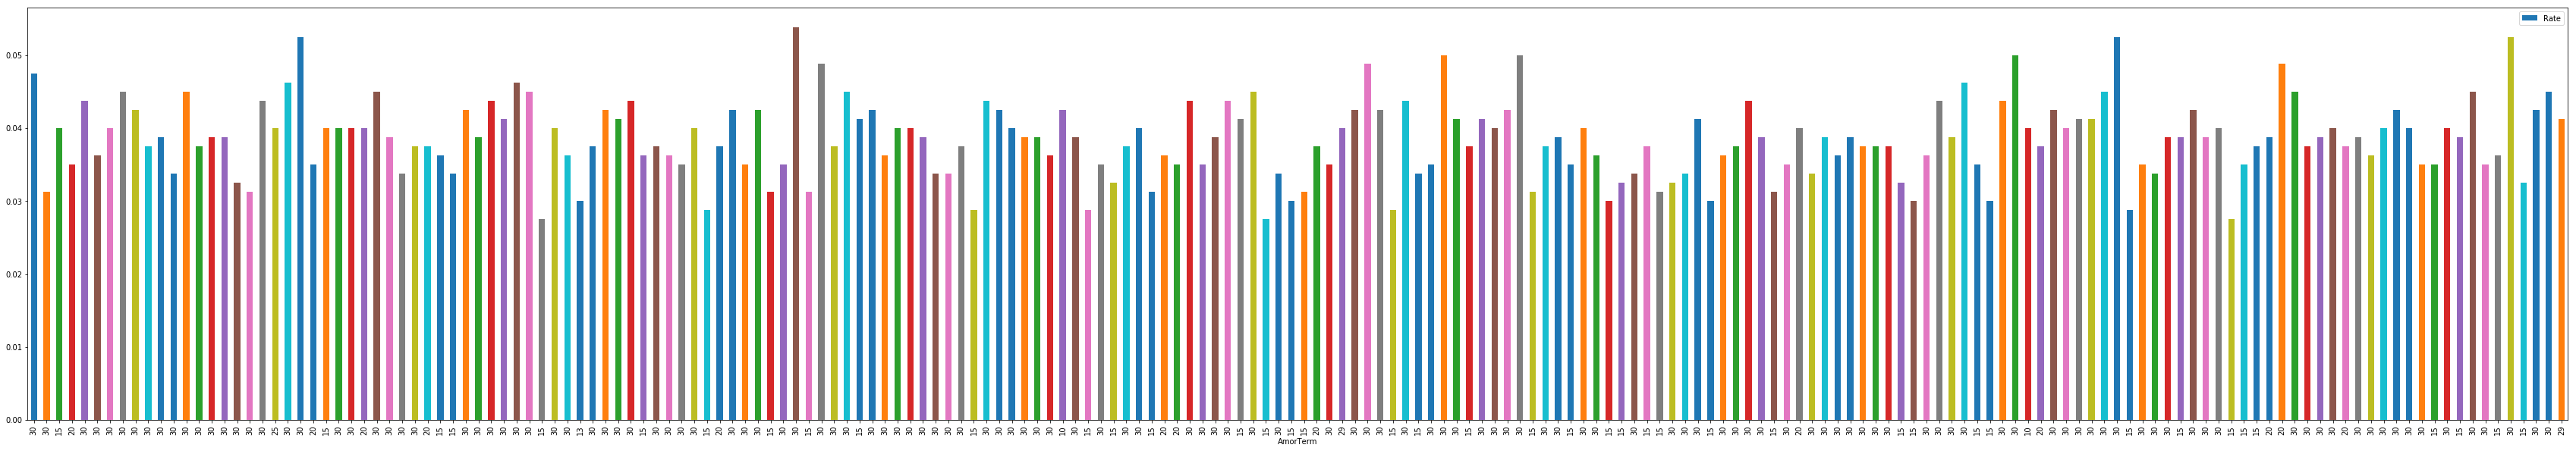

In [27]:
#Plotting AmorTerm and Rate ---> Corr value = 0.78

sample_200.plot(x="AmorTerm", y="Rate", kind = "bar", figsize=(60,10))

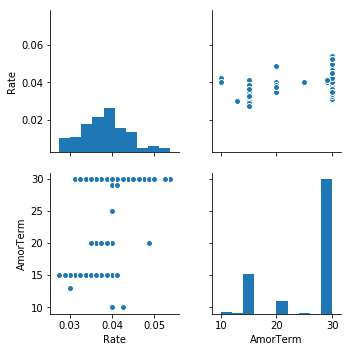

In [28]:
#Using a pairplot
sns.pairplot(sample_200[['Rate', 'AmorTerm']])

Seems, higher the AmorTerm, higher the rate. Taking mean rate for different 
AmorTerms 

In [29]:
sample_200['AmorTerm'].unique()

array([30, 15, 20, 25, 13, 10, 29])

In [30]:
print("Average Interest Rate: ")
c1 = combined_state_data[combined_state_data["AmorTerm"] ==15].describe()["Rate"]['mean']
c2 = combined_state_data[combined_state_data["AmorTerm"] ==30].describe()["Rate"]['mean']
c3 = combined_state_data[combined_state_data["AmorTerm"] ==20].describe()["Rate"]['mean']
c4 = combined_state_data[combined_state_data["AmorTerm"] ==29].describe()["Rate"]['mean']
c5 = combined_state_data[combined_state_data["AmorTerm"] ==27].describe()["Rate"]['mean']


print("1) AmorTerm = 15 \nAverage interest rate =",c1,"\n\n2)AmorTerm = 30\nAverage interest rate =",c2," \n\n3) AmorTerm = 20\nAverage interest rate = ",c3," \n\n4) AmorTerm =29\nAverage interest rate = ",c4," \n\n5) AmorTerm = 27\nAverage interest rate = ",c5)
print("\n\n\nPrime Interest Rates in 2017:\n12/14/2017 4.50%\n06/15/2017 4.25%\n03/16/2017 4.00%\n\n*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm ")
print("\n\n We can strongly conclude the above assumption")

Average Interest Rate: 
1) AmorTerm = 15 
Average interest rate = 0.03408215360330659 

2)AmorTerm = 30
Average interest rate = 0.04005286011881601  

3) AmorTerm = 20
Average interest rate =  0.03810058064516319  

4) AmorTerm =29
Average interest rate =  0.03950649819494564  

5) AmorTerm = 27
Average interest rate =  0.03884882697947214



Prime Interest Rates in 2017:
12/14/2017 4.50%
06/15/2017 4.25%
03/16/2017 4.00%

*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm 


 We can strongly conclude the above assumption


# Income Vs PMT

Looking at the pairplot, we can say the monthly payment is highly co-related to the total income of the borrower. 

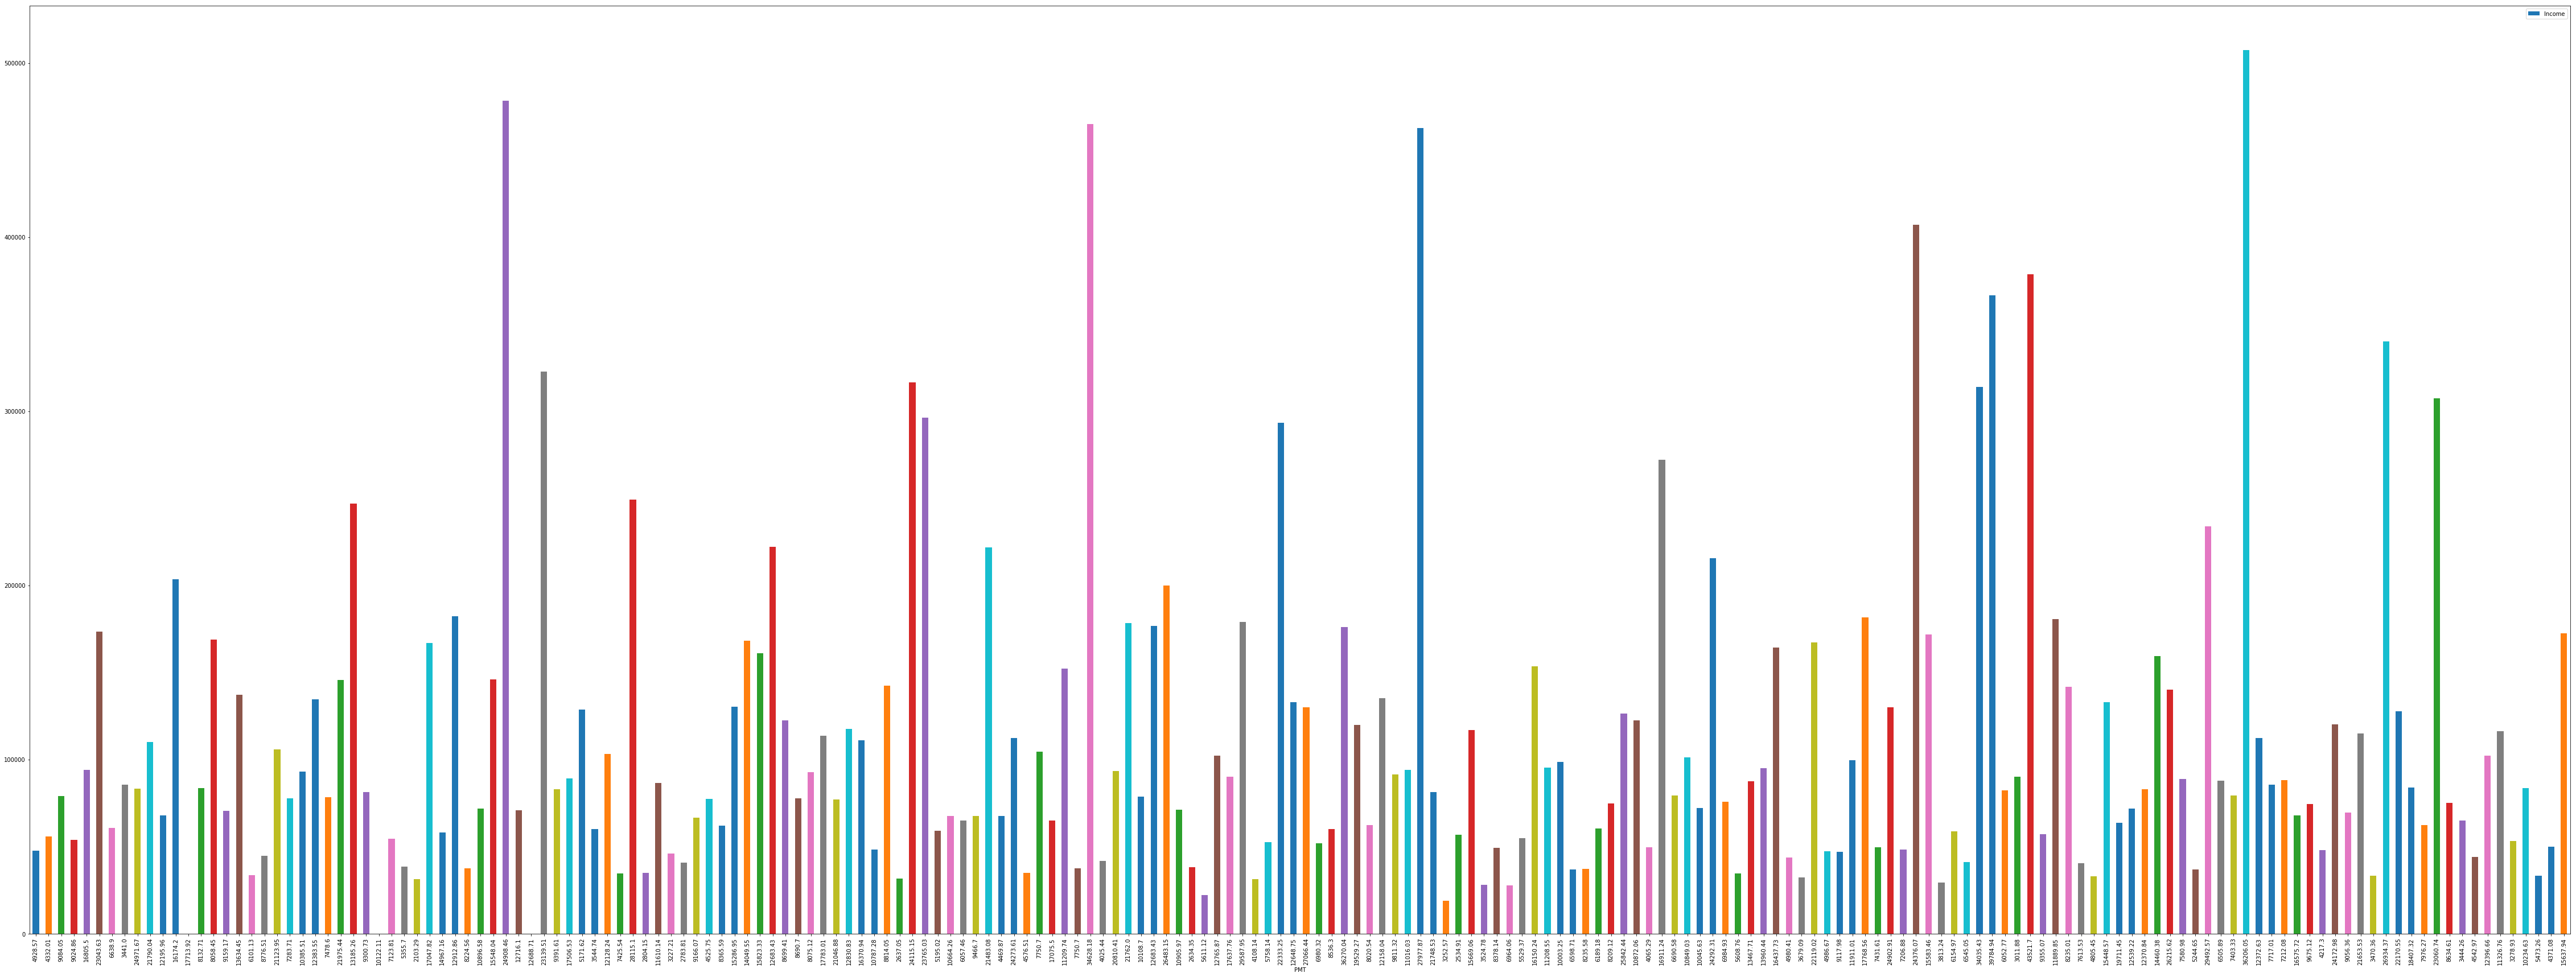

In [31]:
#Plotting PMT, Income and Rate ---> Corr value = 0.78

sample_200.plot(x="PMT", y='Income', kind = "bar", figsize=(80, 30))

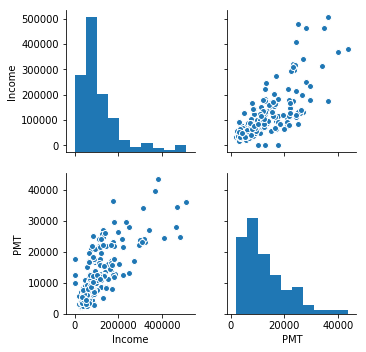

In [32]:
sns.pairplot(sample_200[['Income','PMT']])

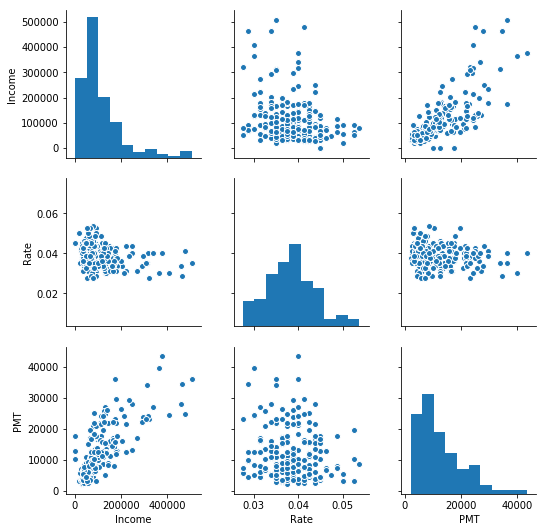

In [33]:
sns.pairplot(sample_200[['Income','Rate','PMT']])

# Let's track down how LTV affects the mortgage applications.

In [34]:
max_LTV_df = sample_200.sort_values('LTV', ascending=False)

In [36]:
min_LTV_df = combined_state_data.sort_values('LTV', ascending=True)

/Users/ujwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


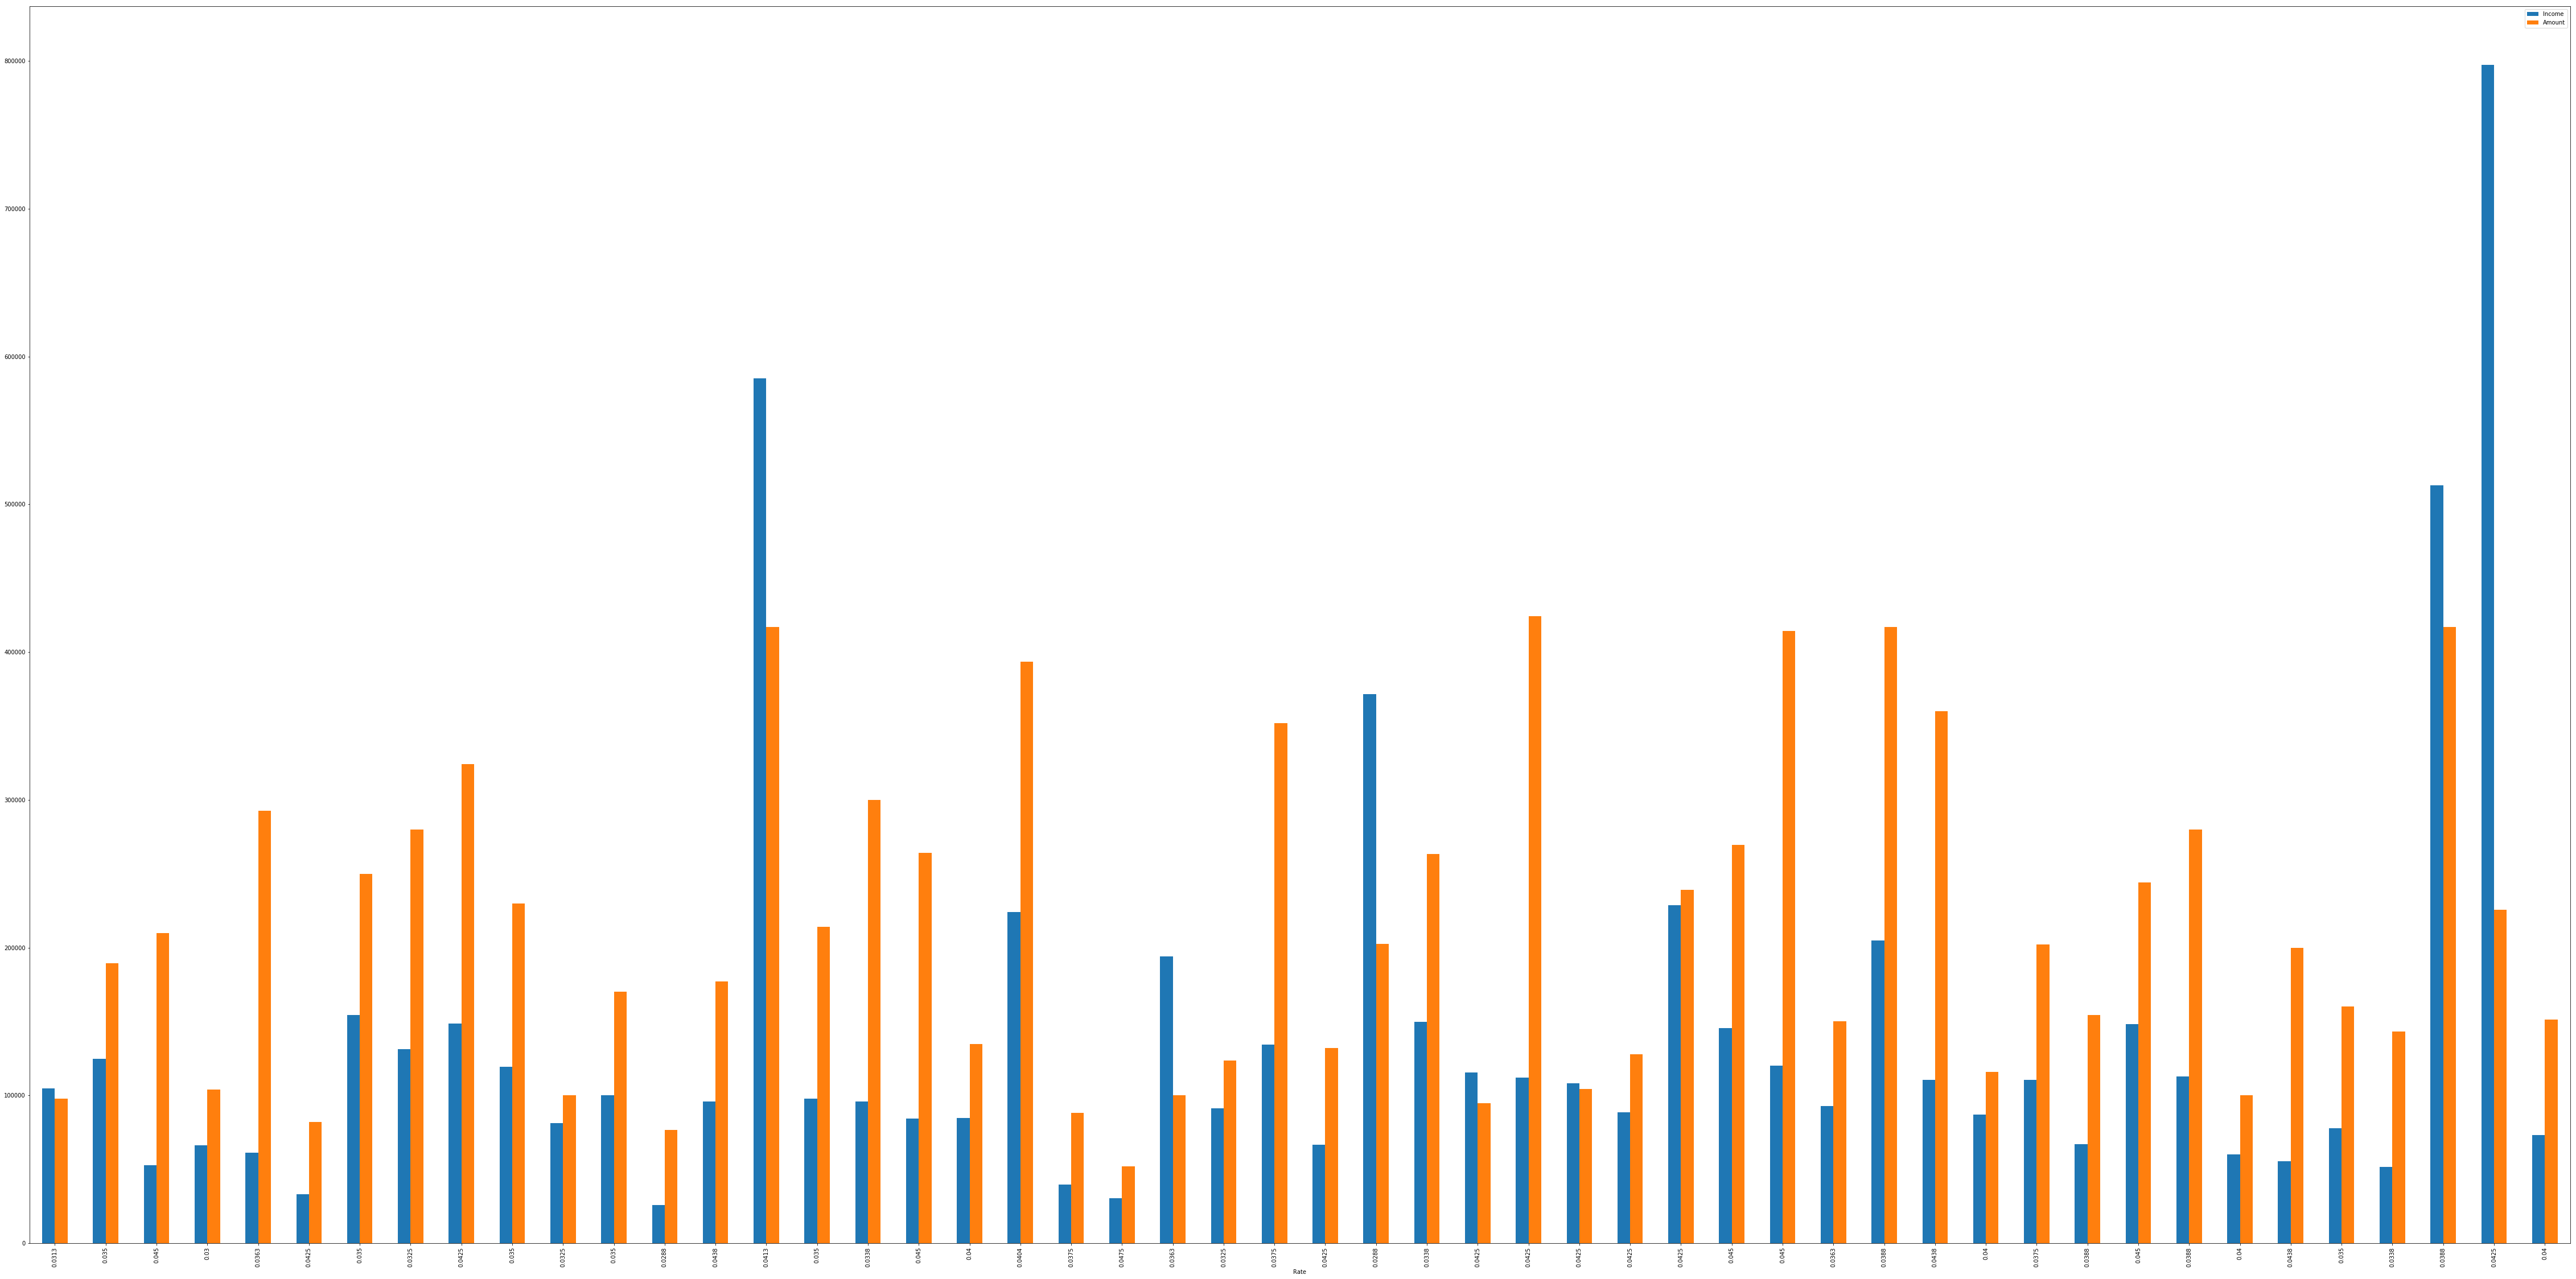

In [38]:
min_ltv_sample = min_LTV_df.sample(50)
min_ltv_sample.plot(x='Rate', y=['Income', 'Amount'], figsize=(80,40), kind = "bar")

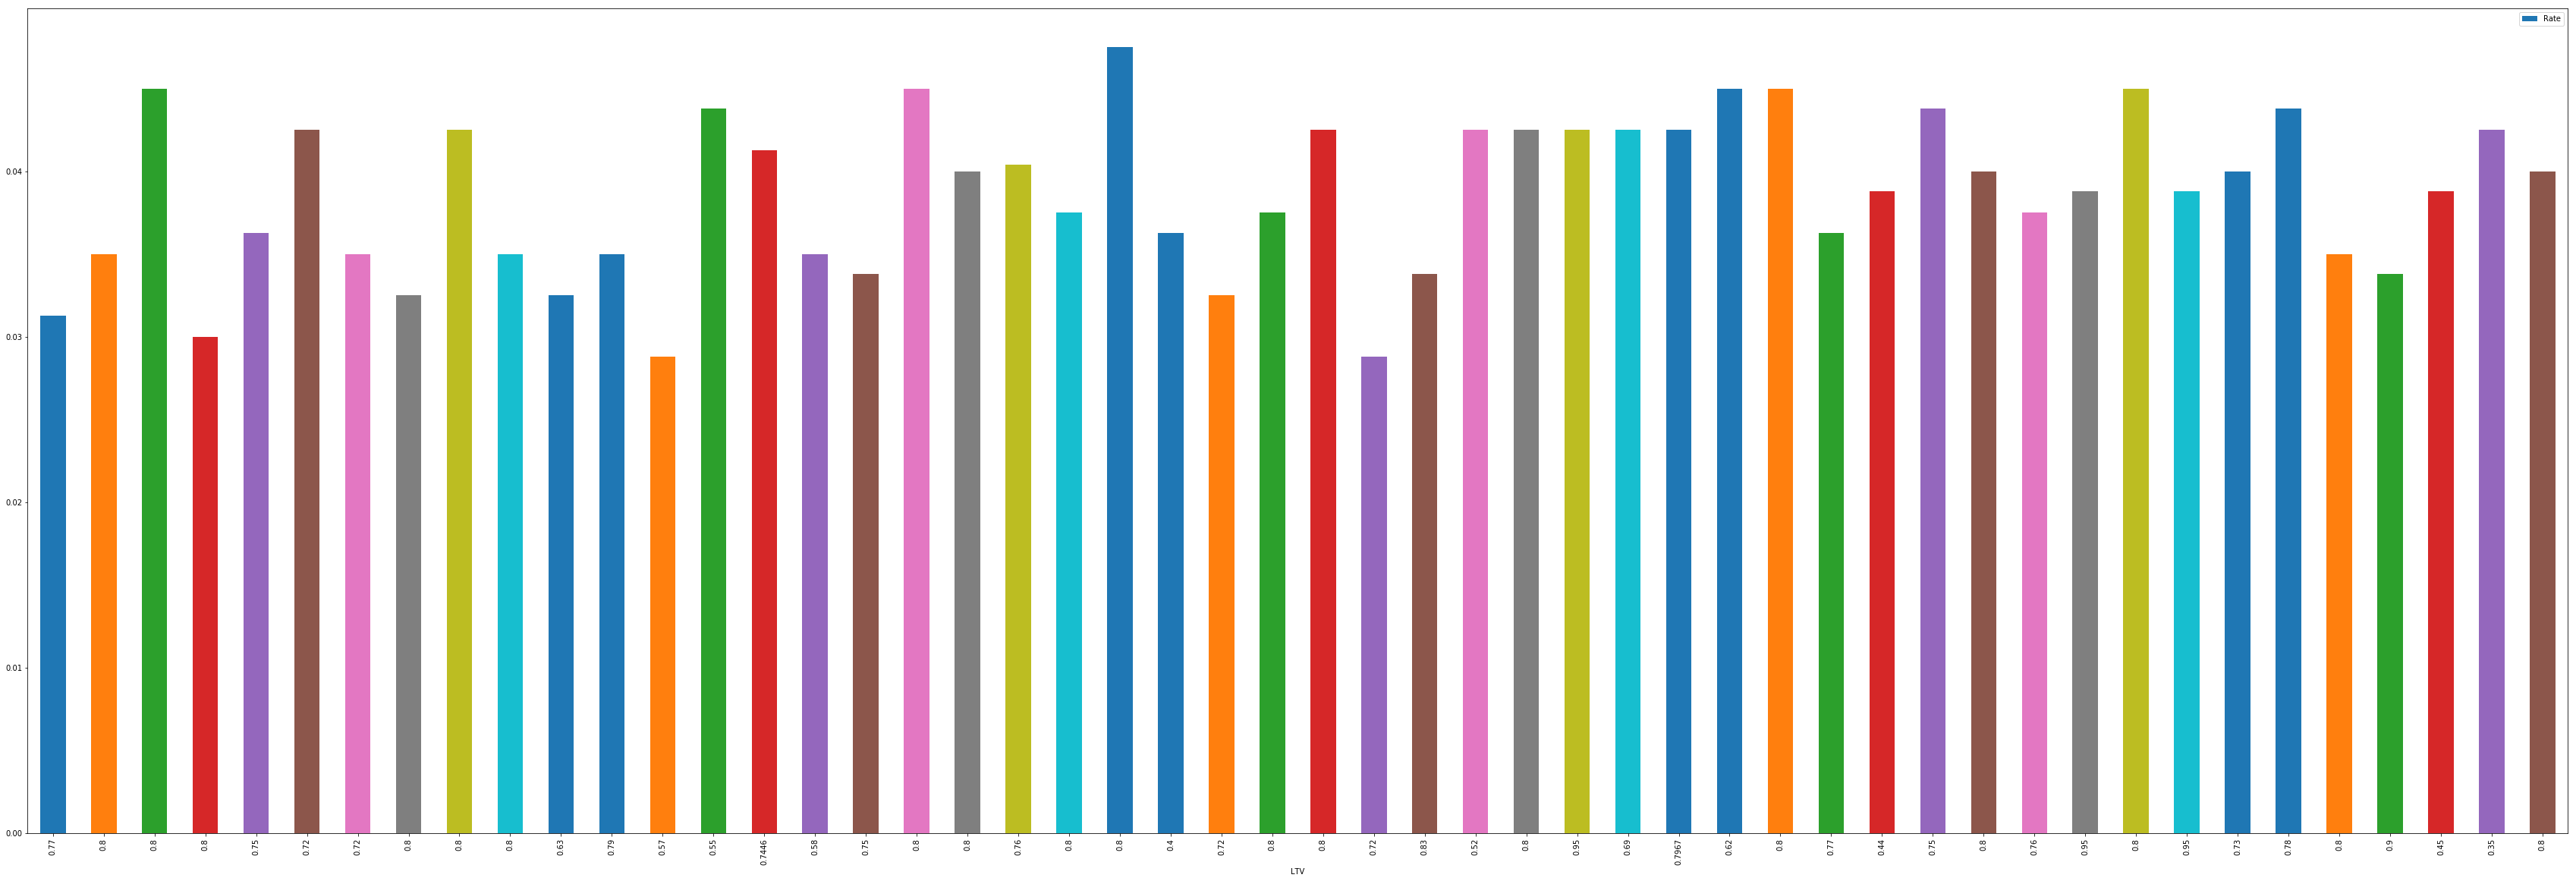

In [39]:
min_ltv_sample.plot(x="LTV", y="Rate", kind="bar", figsize=(60,20))

/Users/ujwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


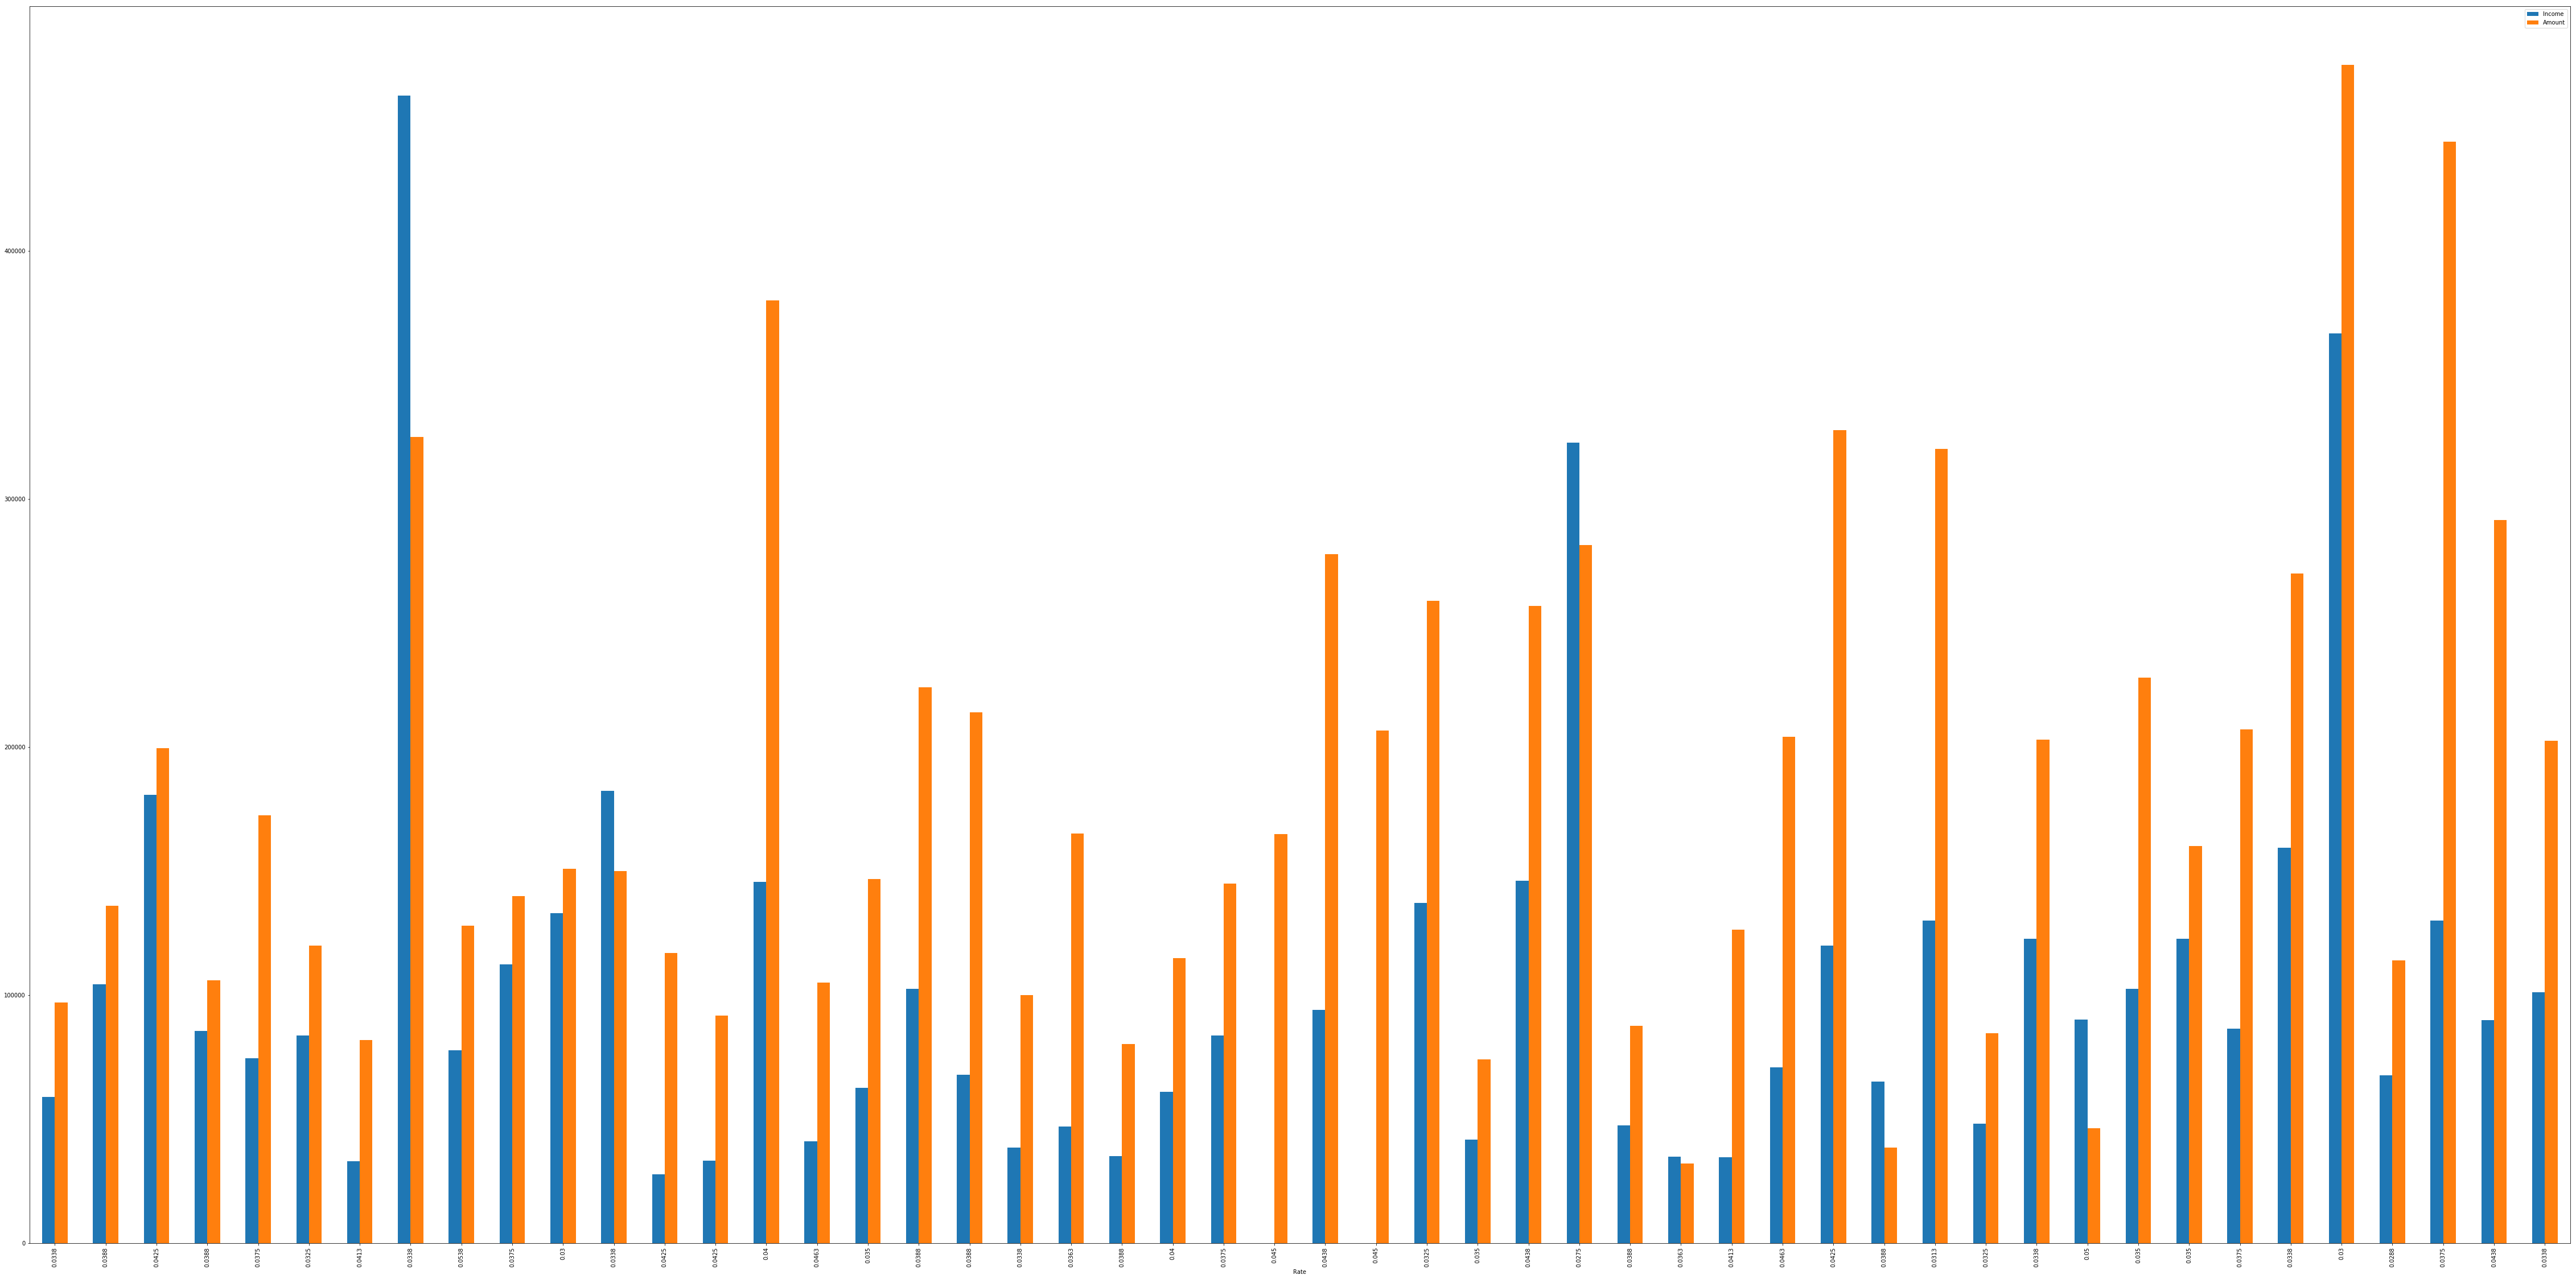

In [40]:
max_ltv_sample = max_LTV_df.sample(50)
max_ltv_sample.plot(x='Rate', y=['Income', 'Amount'], figsize=(80,40), kind = "bar")

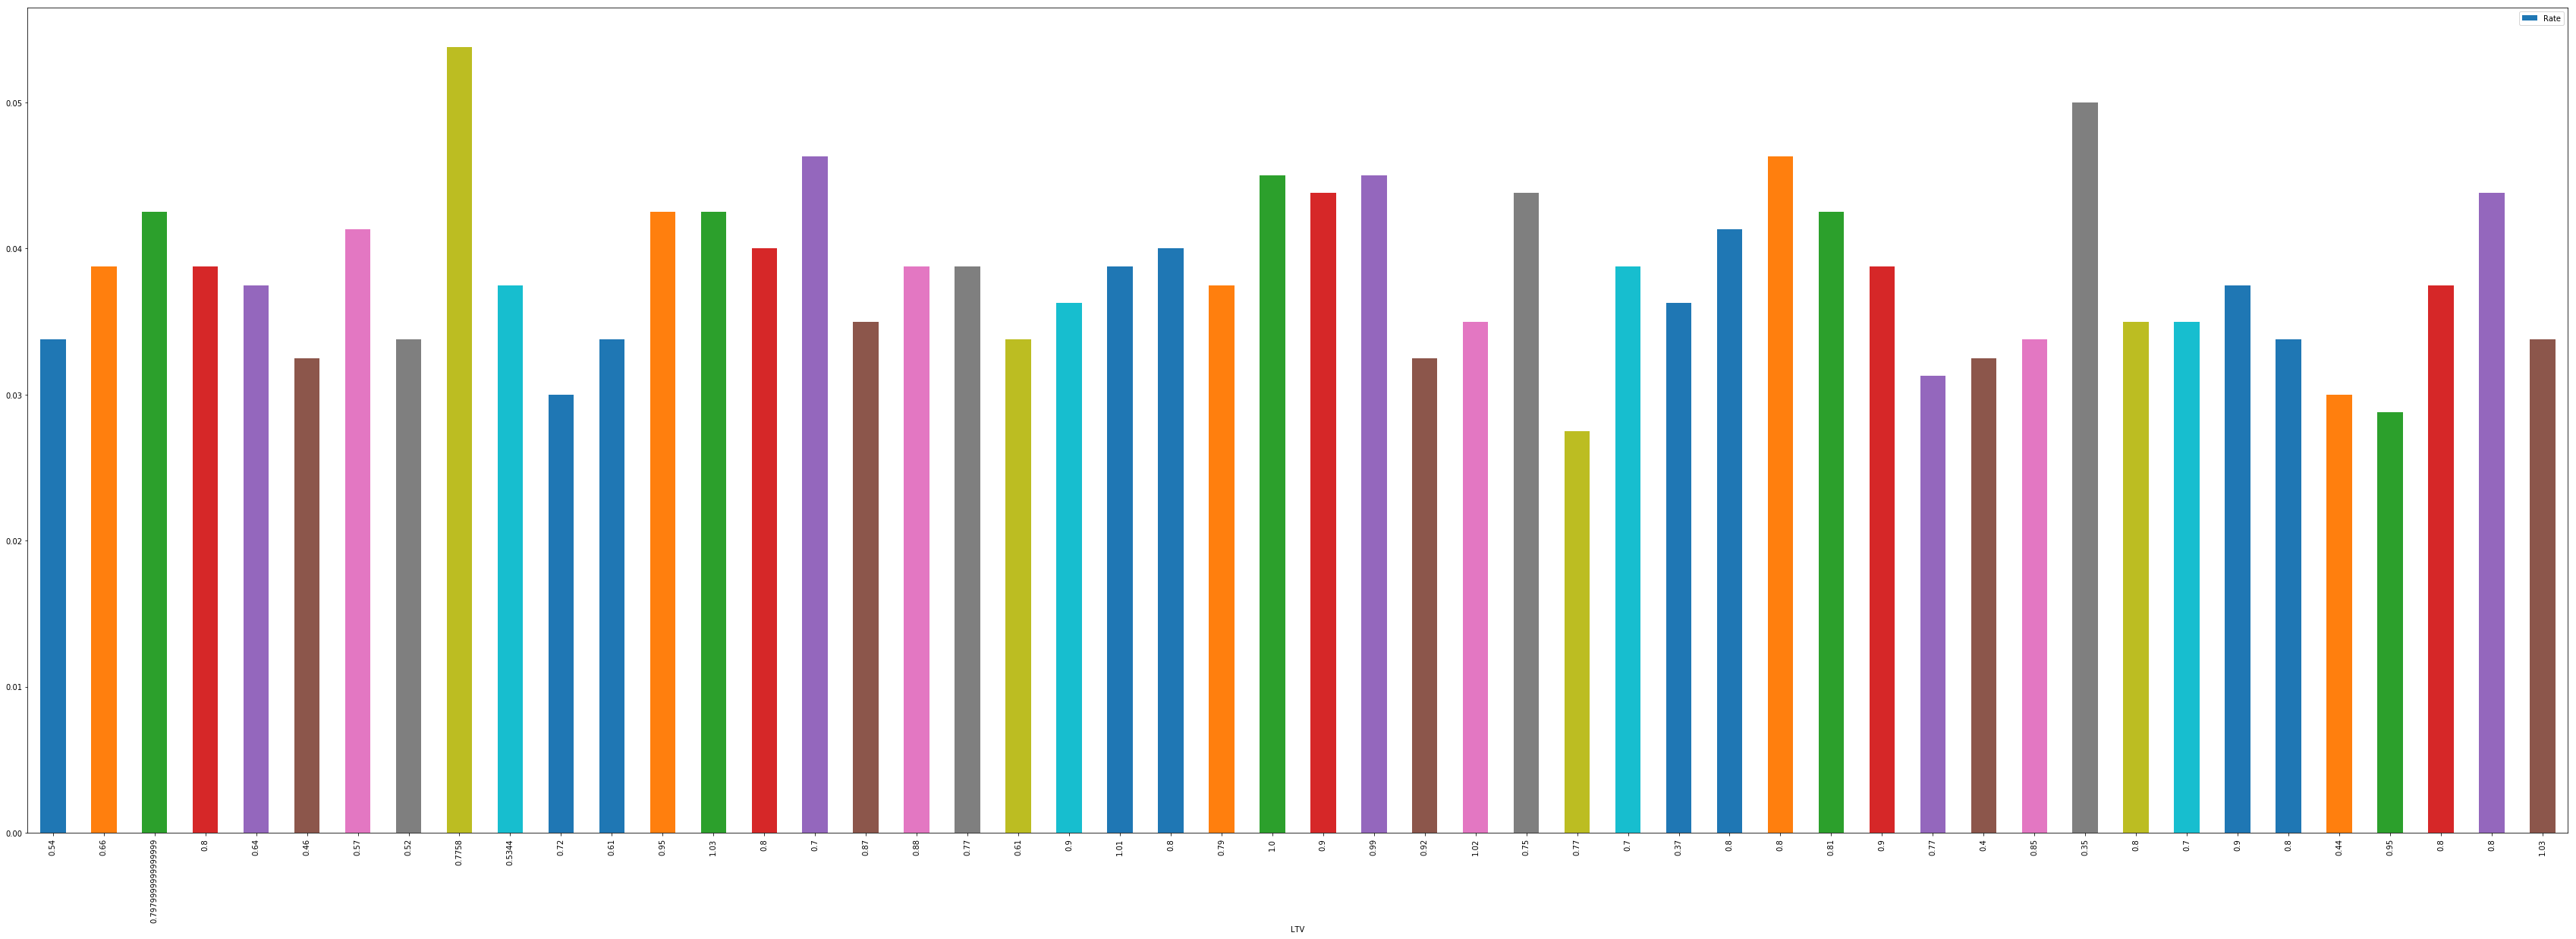

In [41]:
max_ltv_sample.plot(x="LTV", y="Rate", kind="bar", figsize=(60,20))

# No concrete evidence that proves higher LTV causes higher interest rate

Taking mean rate on max and min LTV dataFrames 

In [42]:
print("Average Interest rates for LTV")

c1 = combined_state_data[combined_state_data['LTV']<=0.78].describe()["Rate"]['mean']
c2 = combined_state_data[combined_state_data['LTV']>=0.80].describe()["Rate"]['mean']
print("1) \nAverage interest rate for Min LTV=",c1,"\n\n2)\nAverage interest rate for Max LTV =",c2)

Average Interest rates for LTV
1) 
Average interest rate for Min LTV= 0.03751630049129844 

2)
Average interest rate for Max LTV = 0.039509174981085214


Interest Rate goes high if the LTV is greater than 80%

# Taking average for entire data based on state

In [43]:
## group by state

group_test = combined_state_data.groupby(['StateName']).mean().reset_index()

In [45]:
disp4 = group_test.head(10)
display(HTML(disp4.to_html()))

# Considering all the pre-processing, we can define range of thresholds.

IDEA:

1) Define minimum band which the application should lie under
2) Create a baseline machine learning model and train the model with respect to these range of values
3) Test the model whether it approves an application if it lies under all /most of the thresholds